# Perform univariate and multivariate anomaly detection on the `Sales` and `Profit` columns of the Superstore dataset.

* Use the `Local Outlier Factor` algorithm.
* Write in detail how this algorithm helps us in detecting anomalies.

[Resource](https://scikit-learn.org/stable/modules/outlier_detection.html)




In [ ]:
# !pip install --upgrade xlrd

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/week 13/1. Anomaly Detection/Superstore.xls')

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

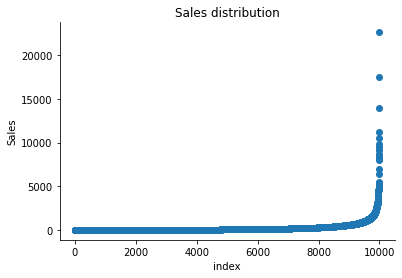

In [ ]:
#Checking dist of sales
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

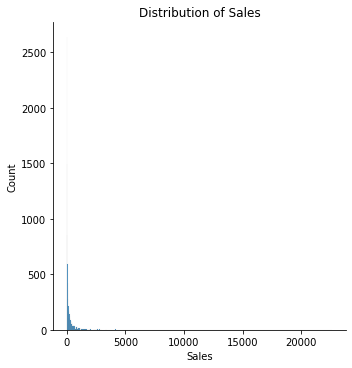

In [ ]:
#Checking dist of sales
sns.displot(df['Sales'])
plt.title('Distribution of Sales')
sns.despine()

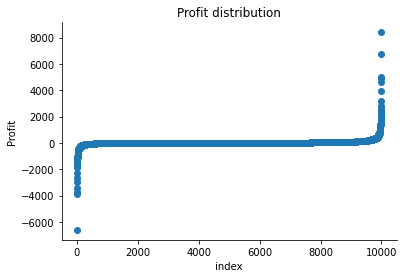

In [ ]:
#Checking dist of Profit
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

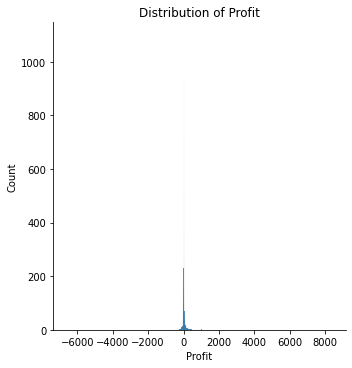

In [ ]:
#Checking dist of Profit
sns.displot(df['Profit'])
plt.title('Distribution of Profit')
sns.despine()

In [ ]:
#making array of sales and profit feature
sp_df=df[['Sales','Profit']]
s_arr=np.asarray(sp_df)
s_arr

array([[261.96  ,  41.9136],
       [731.94  , 219.582 ],
       [ 14.62  ,   6.8714],
       ...,
       [258.576 ,  19.3932],
       [ 29.6   ,  13.32  ],
       [243.16  ,  72.948 ]])

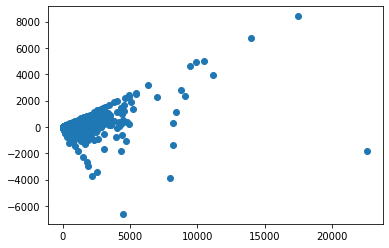

In [ ]:
plt.scatter(s_arr[:,0], s_arr[:,1])
plt.show()

We'll define the model by using the LocalOutlierFactor class of Scikit-learn API. We'll set estimators number and contamination value in arguments. Contamination defines the proportion of outliers in a dataset.


In [ ]:
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.03)

In [ ]:
y_pred=lof.fit_predict(s_arr)

In [ ]:
lofs_index = where(y_pred==-1)


In [ ]:
values = s_arr[lofs_index]

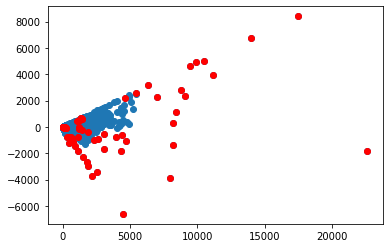

In [ ]:
plt.scatter(s_arr[:,0], s_arr[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

In [ ]:
# reference= https://www.datatechnotes.com/2020/04/anomaly-detection-with-local-outlier-factor-in-python.html

# Multivariate

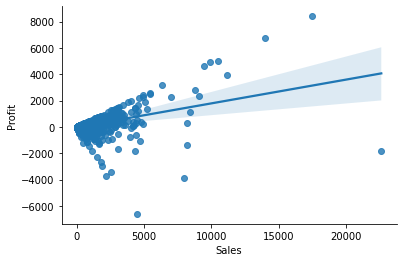

In [ ]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df[['Sales','Profit']])

In [ ]:
clf = LocalOutlierFactor(n_neighbors=100, contamination=0.01,novelty=True)
clf.fit(X)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(X)

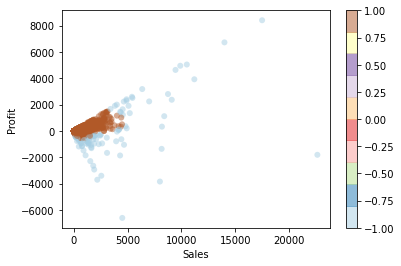

In [ ]:
plt.scatter(df['Sales'], df['Profit'],
            c=df.multivariate_outlier, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar();

In [ ]:
df.sort_values('multivariate_anomaly_score')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,multivariate_anomaly_score,multivariate_outlier
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780,-10.698717,-1
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,-9.808094,-1
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784,-9.352102,-1
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808,-7.295625,-1
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928,-5.590769,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8548,8549,CA-2015-149566,2015-12-05,2015-12-10,Standard Class,GB-14530,George Bell,Corporate,United States,Los Angeles,...,OFF-LA-10000452,Office Supplies,Labels,Avery 488,12.600,4,0.0,6.0480,0.887965,1
2900,2901,CA-2015-166464,2015-09-12,2015-09-17,Standard Class,PG-18895,Paul Gonzalez,Consumer,United States,New York City,...,OFF-LA-10001317,Office Supplies,Labels,Avery 520,12.600,4,0.0,6.0480,0.887965,1
3785,3786,CA-2017-112487,2017-12-26,2017-12-30,Standard Class,TC-21535,Tracy Collins,Home Office,United States,Columbus,...,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,2,0.7,-2.6100,0.888151,1
9869,9870,CA-2014-114195,2014-11-01,2014-11-03,First Class,EA-14035,Erin Ashbrook,Corporate,United States,Mason,...,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,2,0.7,-2.6100,0.888151,1


# Univariate 

Anomaly detection on sales

In [ ]:
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.10,novelty=True)
clf.fit(df['Sales'].values.reshape(-1,1))
df['anomaly_score_univariate_sales'] = clf.decision_function(df['Sales'].values.reshape(-1, 1))
df['outlier_univariate_sales'] = clf.predict(df['Sales'].values.reshape(-1, 1))

In [ ]:
df.sort_values('anomaly_score_univariate_sales')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,multivariate_anomaly_score,multivariate_outlier,anomaly_score_univariate_sales,outlier_univariate_sales
3233,3234,US-2017-156356,2017-04-16,2017-04-22,Standard Class,ND-18370,Natalie DeCherney,Consumer,United States,Houston,...,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292,0.600960,1,-5.768000e+08,-1
7366,7367,CA-2016-127243,2016-11-28,2016-12-04,Standard Class,DS-13180,David Smith,Corporate,United States,Philadelphia,...,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292,0.600960,1,-5.768000e+08,-1
8546,8547,CA-2016-119074,2016-03-27,2016-03-31,Standard Class,DS-13180,David Smith,Corporate,United States,Columbus,...,Binders,Acco Flexible ACCOHIDE Square Ring Data Binder...,32.540,2,0.0,15.9446,0.868393,1,-5.688000e+08,-1
3737,3738,CA-2016-115476,2016-03-17,2016-03-17,Same Day,VM-21835,Vivian Mathis,Consumer,United States,Newark,...,Binders,Acco Flexible ACCOHIDE Square Ring Data Binder...,32.540,2,0.0,15.9446,0.868393,1,-5.688000e+08,-1
6825,6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480,2,0.0,4.8720,0.717195,1,-5.352000e+08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,5593,CA-2014-164742,2014-10-13,2014-10-18,Second Class,ML-17395,Marina Lichtenstein,Corporate,United States,Lakewood,...,Binders,Flexible Leather- Look Classic Collection Ring...,18.940,1,0.0,9.4700,0.887717,1,4.084906e-01,1
3386,3387,CA-2017-148404,2017-10-07,2017-10-11,Standard Class,Dp-13240,Dean percer,Home Office,United States,Charlotte,...,Fasteners,Staples,18.936,3,0.2,5.9175,0.841425,1,4.114374e-01,1
7848,7849,CA-2016-104311,2016-05-02,2016-05-06,Standard Class,AS-10090,Adam Shillingsburg,Consumer,United States,Irving,...,Storage,Akro Stacking Bins,18.936,3,0.2,-3.7872,0.286529,1,4.114374e-01,1
2701,2702,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,Fasteners,Staples,18.936,3,0.2,5.9175,0.841425,1,4.114374e-01,1


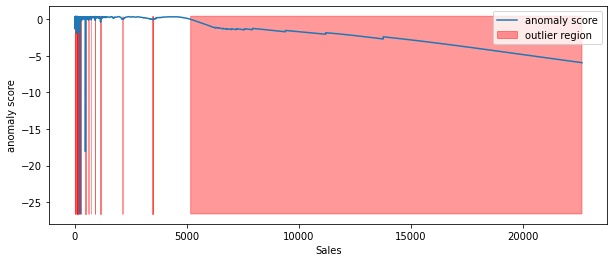

In [ ]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = clf.decision_function(xx)
outlier = clf.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

Anomaly detection on profit

In [ ]:
model=LocalOutlierFactor(n_neighbors=20,contamination=0.10,novelty=True)
model.fit(df['Profit'].values.reshape(-1,1))
df['anomaly_score_univariate_profit'] = clf.decision_function(df['Profit'].values.reshape(-1, 1))
df['outlier_univariate_profit'] = clf.predict(df['Profit'].values.reshape(-1, 1))

In [ ]:
df.sort_values('anomaly_score_univariate_profit')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,multivariate_anomaly_score,multivariate_outlier,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
5596,5597,CA-2015-159779,2015-09-25,2015-09-29,Standard Class,SB-20185,Sarah Brown,Consumer,United States,Concord,...,68.620,2,0.0,32.2514,0.757142,1,0.339742,1,-7.667550e+08,-1
4579,4580,US-2014-150126,2014-07-27,2014-08-02,Standard Class,AS-10045,Aaron Smayling,Corporate,United States,New York City,...,65.780,11,0.0,32.2322,0.772524,1,0.300799,1,-6.942150e+08,-1
7206,7207,CA-2017-137414,2017-10-02,2017-10-06,Standard Class,CM-12115,Chad McGuire,Consumer,United States,San Francisco,...,369.160,11,0.2,32.3015,0.839118,1,0.359557,1,-5.928000e+08,-1
4126,4127,CA-2017-156769,2017-05-06,2017-05-09,First Class,GZ-14470,Gary Zandusky,Consumer,United States,Arlington,...,54.660,6,0.0,18.0378,0.853092,1,0.243964,1,-5.799000e+08,-1
3682,3683,CA-2015-132626,2015-07-09,2015-07-14,Standard Class,BT-11680,Brian Thompson,Consumer,United States,Clinton,...,79.360,4,0.0,32.5376,0.832713,1,0.338826,1,-5.640000e+08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,8117,CA-2017-105543,2017-11-24,2017-11-24,Same Day,BG-11695,Brooke Gillingham,Corporate,United States,Garden City,...,33.290,1,0.0,7.9896,0.738857,1,0.241351,1,4.275282e-01,1
6543,6544,US-2017-107888,2017-11-16,2017-11-19,First Class,CC-12220,Chris Cortes,Consumer,United States,Seattle,...,33.290,1,0.0,7.9896,0.738857,1,0.241351,1,4.275282e-01,1
4320,4321,CA-2014-152345,2014-12-29,2015-01-03,Second Class,ST-20530,Shui Tom,Consumer,United States,Albuquerque,...,33.290,1,0.0,7.9896,0.738857,1,0.241351,1,4.275282e-01,1
8855,8856,CA-2017-163671,2017-12-24,2017-12-30,Standard Class,DP-13105,Dave Poirier,Corporate,United States,Meridian,...,21.312,3,0.2,7.9920,0.783828,1,0.326086,1,4.275282e-01,1


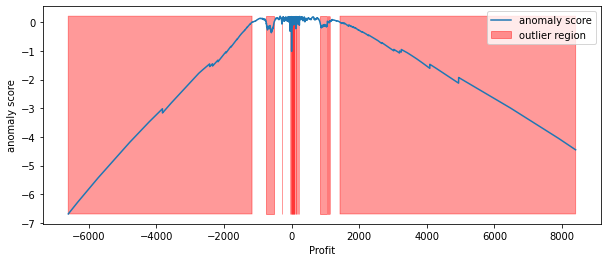

In [ ]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = model.decision_function(xx)
outlier = model.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

In [ ]:
df[(df['outlier_univariate_profit']==-1) & (df['outlier_univariate_sales']==-1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,multivariate_anomaly_score,multivariate_outlier,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,190.920,5,0.6,-147.9630,0.419793,1,-1.061093e+00,-1,-6.059946e+02,-1
78,79,US-2014-147606,2014-11-26,2014-12-01,Second Class,JE-15745,Joel Eaton,Consumer,United States,Houston,...,19.300,5,0.6,-14.4750,0.776842,1,-3.909000e+08,-1,-6.181082e+01,-1
96,97,CA-2017-161018,2017-11-09,2017-11-11,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,...,96.530,7,0.0,40.5426,0.832420,1,-2.697838e+00,-1,-1.176813e-02,-1
103,104,US-2015-156867,2015-11-13,2015-11-17,Standard Class,LC-16870,Lena Cacioppo,Consumer,United States,Aurora,...,238.896,6,0.2,-26.8758,0.747865,1,-1.503000e+00,-1,-1.123645e+02,-1
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,8159.952,8,0.4,-1359.9920,-2.604282,-1,-1.309234e+00,-1,-5.547012e+03,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9810,9811,US-2014-139640,2014-11-07,2014-11-11,Second Class,TB-21595,Troy Blackwell,Consumer,United States,Portland,...,120.768,4,0.2,9.0576,0.838345,1,-6.035085e-01,-1,-2.535394e-02,-1
9820,9821,CA-2015-162201,2015-06-08,2015-06-12,Standard Class,AG-10495,Andrew Gjertsen,Corporate,United States,Saint Petersburg,...,42.240,10,0.2,13.2000,0.853179,1,-2.045997e+00,-1,-1.899802e-02,-1
9842,9843,US-2016-125402,2016-09-25,2016-10-01,Standard Class,DL-12865,Dan Lawera,Consumer,United States,Long Beach,...,483.136,4,0.2,60.3920,0.849616,1,-8.410623e+00,-1,-1.859720e-02,-1
9892,9893,US-2016-115441,2016-07-25,2016-07-28,Second Class,SH-19975,Sally Hughsby,Corporate,United States,Milwaukee,...,297.550,5,0.0,83.3140,0.845227,1,-2.446069e-01,-1,-5.366217e-01,-1


In [ ]:
df[(df['outlier_univariate_sales'] == 1) & (df['outlier_univariate_profit'] == 1) & (df['multivariate_outlier'] == -1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,multivariate_anomaly_score,multivariate_outlier,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
318,319,CA-2014-164973,2014-11-04,2014-11-09,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,...,3991.980,2,0.0,1995.9900,-0.426068,-1,0.312320,1,0.342898,1
353,354,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,4355.168,4,0.2,1415.4296,-0.121897,-1,0.350386,1,0.314481,1
1085,1086,US-2016-143819,2016-03-01,2016-03-05,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,...,4899.930,7,0.0,2400.9657,-0.987424,-1,0.199698,1,0.366702,1
2492,2493,CA-2014-144624,2014-11-19,2014-11-23,Standard Class,JM-15865,John Murray,Consumer,United States,Jamestown,...,4548.810,7,0.0,1228.1787,-0.101478,-1,0.338253,1,0.215726,1
4218,4219,CA-2017-149881,2017-04-01,2017-04-03,First Class,NC-18535,Nick Crebassa,Corporate,United States,San Francisco,...,4799.984,2,0.2,359.9988,-0.115863,-1,0.254881,1,0.348436,1
5884,5885,CA-2016-136301,2016-03-13,2016-03-15,Second Class,EH-13765,Edward Hooks,Corporate,United States,San Francisco,...,4912.590,3,0.0,196.5036,-0.210930,-1,0.193142,1,0.287030,1
5917,5918,US-2015-126977,2015-09-17,2015-09-23,Standard Class,PF-19120,Peter Fuller,Consumer,United States,New York City,...,4228.704,6,0.2,158.5764,-0.027665,-1,0.345678,1,0.208863,1
7683,7684,CA-2015-120782,2015-04-28,2015-05-01,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,...,3812.970,3,0.0,1906.4850,-0.368711,-1,0.241955,1,0.307277,1
7818,7819,CA-2016-138478,2016-10-21,2016-10-26,Second Class,DP-13390,Dennis Pardue,Home Office,United States,North Las Vegas,...,4535.976,3,0.2,1644.2913,-0.295640,-1,0.338253,1,0.353666,1
7914,7915,CA-2017-165323,2017-06-17,2017-06-21,Standard Class,SR-20740,Steven Roelle,Home Office,United States,New York City,...,3404.500,5,0.0,1668.2050,-0.136394,-1,0.015619,1,0.309969,1


refer solution notebook for theory about LOF